In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.5 MB/s 
     |████████████████████████████████| 48 kB 1.6 MB/s 
     |████████████████████████████████| 189 kB 23.2 MB/s 
     |████████████████████████████████| 1.2 MB 29.6 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 247 kB/s 
     |████████████████████████████████| 561 kB 35.2 MB/s 
     |████████████████████████████████| 130 kB 31.1 MB/s 
Mounted at /content/gdrive


In [5]:
from fastbook import *
from fastai.vision.widgets import *
import matplotlib.pyplot as plt

In [6]:
data_path = Path('/content/gdrive/MyDrive/ENEL 400/Data/')
data_types = ['Ambulance_spec','Other_spec']

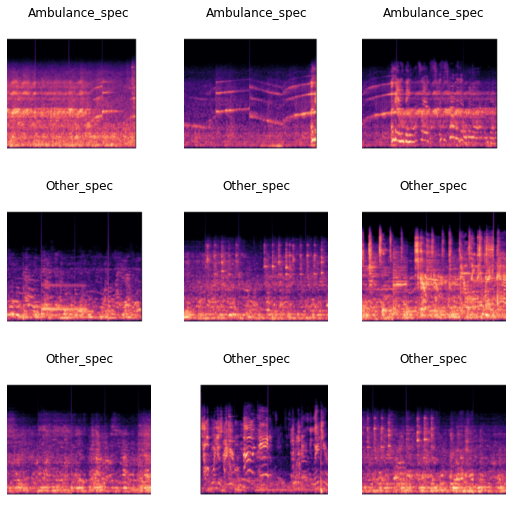

In [11]:
specs = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.15, seed=69),
                  item_tfms=Resize(224),
                   get_y=parent_label)

dls = specs.dataloaders(data_path,bs=16,seed=69)
dls.train.show_batch()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

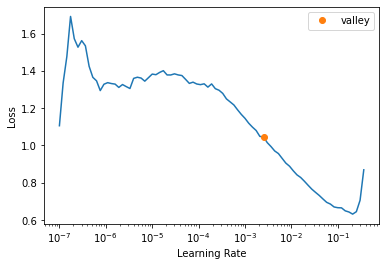

In [13]:
set_seed(69,True)
dls = specs.dataloaders(data_path,bs=16,seed=69)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
lr_valley = learn.lr_find()

In [16]:
set_seed(69,True)
dls = specs.dataloaders(data_path,bs=16,seed=69)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(3, lr_valley)
learn.unfreeze()
learn.fit_one_cycle(30, lr_max=slice(1e-4,2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.597982,0.028603,0.987179,00:18
1,0.286656,0.002074,1.000000,00:14
2,0.193422,0.000599,1.000000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.119282,0.000080,1.000000,00:16
1,0.136813,0.104200,0.974359,00:15
2,0.201277,0.024218,0.987179,00:15
3,0.231061,0.032473,0.987179,00:15
4,0.237797,1.379981,0.833333,00:15
5,0.166034,0.018049,1.000000,00:15
6,0.162424,5.576579,0.782051,00:15
7,0.216292,0.000037,1.000000,00:15
8,0.200211,0.099686,0.961538,00:15
9,0.177125,0.000000,1.000000,00:15


KeyboardInterrupt: ignored

In [17]:
#retrain for 11 epochs
set_seed(69,True)
dls = specs.dataloaders(data_path,bs=16,seed=69)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(3, lr_valley)
learn.unfreeze()
learn.fit_one_cycle(11, lr_max=slice(1e-4,2e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.597982,0.028603,0.987179,00:15
1,0.286656,0.002074,1.000000,00:14
2,0.193422,0.000599,1.000000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.171590,0.120500,0.974359,00:15
1,0.220208,0.007586,1.000000,00:15
2,0.358130,0.544469,0.935897,00:16
3,0.331129,0.000000,1.000000,00:16
4,0.346479,0.391825,0.948718,00:16
5,0.253252,0.000130,1.000000,00:16
6,0.188312,0.000122,1.000000,00:15
7,0.126425,0.000089,1.000000,00:15
8,0.073808,0.000001,1.000000,00:15
9,0.042784,0.000002,1.000000,00:15


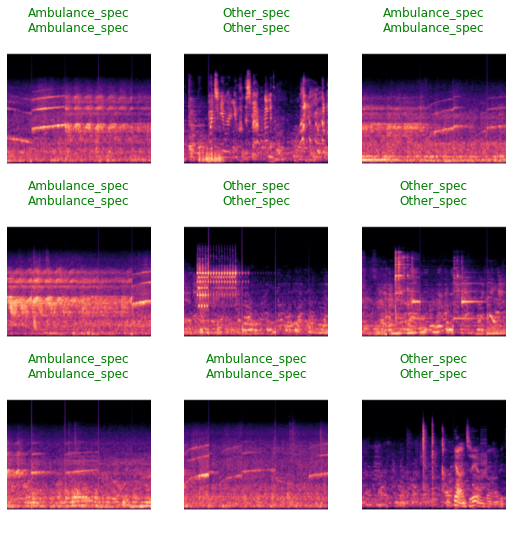

In [18]:
learn.show_results()

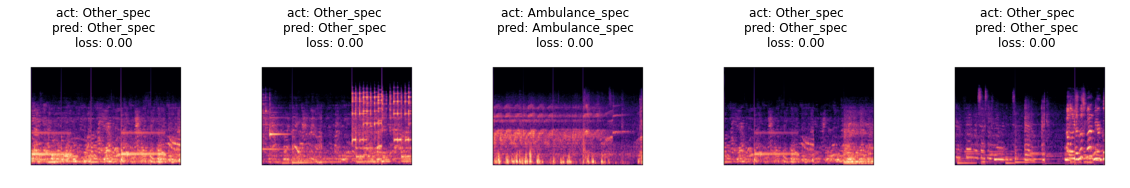

In [19]:
k=5
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses(k)
predicteds = interp.preds[idxs].argmax(axis=1)
fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20, 10))

for ax, id, loss, pred in zip(axs, idxs, losses, predicteds):
    img, actual = dls.valid_ds[id]
    img.show(ctx=ax)
    ax.set_title(f'act: {dls.vocab[actual.item()]}\npred: {dls.vocab[pred]}\nloss: {loss:.2f}')

In [23]:
learn.export(data_path/'Model'/'specmodel_resnet18_lrmod.pkl')

In [24]:
learn = load_learner(data_path/'Model'/'specmodel_resnet18_lrmod.pkl')

In [28]:
learn.predict(data_path/'spec_test_is_ambulance.png')

('Ambulance_spec', TensorBase(0), TensorBase([9.9999e-01, 1.2506e-05]))